In [1]:
from google.colab import drive 
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
#drive.flush_and_unmount(timeout_ms=24)

In [2]:

import numpy as np
import pandas as pd
import pickle
import numpy as np
import random
import time
import os
#os.environ["OPENCV_IO_MAX_IMAGE_PIXELS"] = pow(2,40).__str__()
import cv2
from tqdm import tqdm

import tensorflow as tf
from tensorflow.python.keras import Sequential
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from IPython.display import display
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from keras import optimizers
from sklearn.metrics import classification_report, confusion_matrix
from keras.callbacks import CSVLogger, LambdaCallback

In [3]:
dataset_dir = "drive/My Drive/Plant_Leaf_MalayaKew_MK_Dataset/"
work_dir = "drive/My Drive/Plant_Leaf_MalayaKew_MK_Dataset/Records/"
data_instance = 128

In [ ]:
'''
list_categories = [f"Class{i}" for i in range(1,45)]
num_classes = len(list_categories)
print('num_classes =', num_classes)
#'''

'\nlist_categories = [f"Class{i}" for i in range(1,45)]\nnum_classes = len(list_categories)\nprint(\'num_classes =\', num_classes)\n#'

In [ ]:
# Saving files:
'''
np.save(work_dir+"np_test_imageset.pkl", np_test_imageset, allow_pickle=True)
np.save(work_dir+"np_val_imageset.pkl", np_val_imageset, allow_pickle=True)
np.save(work_dir+"np_train_imageset.pkl", np_train_imageset, allow_pickle=True)

np.save(work_dir+"np_test_label.pkl", np_test_label, allow_pickle=True)
np.save(work_dir+"np_val_label.pkl", np_val_label, allow_pickle=True)
np.save(work_dir+"np_train_label.pkl", np_train_label, allow_pickle=True)
#'''

'\nnp.save(work_dir+"np_test_imageset.pkl", np_test_imageset, allow_pickle=True)\nnp.save(work_dir+"np_val_imageset.pkl", np_val_imageset, allow_pickle=True)\nnp.save(work_dir+"np_train_imageset.pkl", np_train_imageset, allow_pickle=True)\n\nnp.save(work_dir+"np_test_label.pkl", np_test_label, allow_pickle=True)\nnp.save(work_dir+"np_val_label.pkl", np_val_label, allow_pickle=True)\nnp.save(work_dir+"np_train_label.pkl", np_train_label, allow_pickle=True)\n#'

In [8]:
# Loading files:
np_test_imageset = np.load(f"{dataset_dir}D2_Gray3D_crop_{data_instance}x{data_instance}_test_X.pkl.npy", allow_pickle=True)
np_train_imageset = np.load(f"{dataset_dir}D2_Gray3D_crop_{data_instance}x{data_instance}_train_X.pkl.npy", allow_pickle=True)

np_test_label_str = np.load(f"{dataset_dir}D2_Gray3D_crop_{data_instance}x{data_instance}_test_y.pkl.npy", allow_pickle=True)
np_train_label_str = np.load(f"{dataset_dir}D2_Gray3D_crop_{data_instance}x{data_instance}_train_y.pkl.npy", allow_pickle=True)

In [9]:
print(f"np_test_imageset.shape = {np_test_imageset.shape}")
print(f"np_train_imageset.shape = {np_train_imageset.shape}")

np_test_imageset.shape = (8800, 128, 128)
np_train_imageset.shape = (34672, 128, 128)


In [10]:
np_train_imageset_2D = np_train_imageset
np_test_imageset_2D = np_test_imageset

In [11]:
#'''
np_train_imageset_3D_channel_first = np.array([np_train_imageset_2D, np_train_imageset_2D, np_train_imageset_2D])
np_train_imageset_3D = np.moveaxis(np_train_imageset_3D_channel_first, 0, -1)
np_train_imageset = np_train_imageset_3D

print(f"np_train_imageset_3D_channel_first.shape = {np_train_imageset_3D_channel_first.shape}")
print(f"np_train_imageset_3D.shape = {np_train_imageset_3D.shape}")
print(f"np_train_imageset.shape = {np_train_imageset.shape}\n")

np_test_imageset_3D_channel_first = np.array([np_test_imageset_2D, np_test_imageset_2D, np_test_imageset_2D])
np_test_imageset_3D = np.moveaxis(np_test_imageset_3D_channel_first, 0, -1)
np_test_imageset = np_test_imageset_3D

print(f"np_test_imageset_3D_channel_first.shape = {np_test_imageset_3D_channel_first.shape}")
print(f"np_test_imageset_3D.shape = {np_test_imageset_3D.shape}")
print(f"np_test_imageset.shape = {np_test_imageset.shape}")
#'''

np_train_imageset_3D_channel_first.shape = (3, 34672, 128, 128)
np_train_imageset_3D.shape = (34672, 128, 128, 3)
np_train_imageset.shape = (34672, 128, 128, 3)

np_test_imageset_3D_channel_first.shape = (3, 8800, 128, 128)
np_test_imageset_3D.shape = (8800, 128, 128, 3)
np_test_imageset.shape = (8800, 128, 128, 3)


In [12]:
np_test_label_1_based = np_test_label_str.astype(np.int)
np_train_label_1_based = np_train_label_str.astype(np.int)

In [13]:
classes = np.unique(np_test_label_1_based)
num_classes = len(classes)

print('num_classes =', num_classes)
print(f"Labels: {classes}")

num_classes = 44
Labels: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44]


In [14]:
np_test_label = np_test_label_1_based-min(np_test_label_1_based)
np_train_label = np_train_label_1_based-min(np_test_label_1_based)

In [15]:
classes = np.unique(np_test_label)
num_classes = len(classes)

print('num_classes =', num_classes)
print(f"Zero-based Labels: {classes}")

num_classes = 44
Zero-based Labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]


In [16]:
#'''
final_test_imageset = np.expand_dims(np_test_imageset, axis = 4)
final_train_imageset = np.expand_dims(np_train_imageset, axis = 4)
#'''
'''
final_test_imageset = np.expand_dims(np_test_imageset, axis = 3)
final_train_imageset = np.expand_dims(np_train_imageset, axis = 3)
#'''

test_label2 = np.expand_dims(np_test_label, axis = 1)
train_label2 = np.expand_dims(np_train_label, axis = 1)

print('final_test_imageset.shape =', final_test_imageset.shape)
print('final_train_imageset.shape =', final_train_imageset.shape)

print('\ntest_label2.shape =', test_label2.shape)
print('train_label2.shape =', train_label2.shape)

final_test_imageset.shape = (8800, 128, 128, 3, 1)
final_train_imageset.shape = (34672, 128, 128, 3, 1)

test_label2.shape = (8800, 1)
train_label2.shape = (34672, 1)


In [17]:
final_test_label = tf.keras.utils.to_categorical(test_label2, num_classes)
final_train_label = tf.keras.utils.to_categorical(train_label2, num_classes)

print('final_test_label.shape =',final_test_label.shape)
print('final_train_label.shape =',final_train_label.shape)

final_test_label.shape = (8800, 44)
final_train_label.shape = (34672, 44)


In [18]:
# DenseNet121 ResNet101 DenseNet201 InceptionV3 Xception NASNetLarge ResNet152V2 InceptionResNetV2 EfficientNetB7
impl_type = "TransferLearning3D.DenseNet201" # TransferLearning3D 
dataset = f"MalayaKew.gray3D.{np_test_imageset.shape[1:]}" # +str(img_size)+"p"

In [19]:
#'''
count_no_improvement = 0
epoch_initial = True
#'''

In [21]:
#NUM_NEURONS = 16
#NUM_LAYERS = 3
BATCH_SIZE = 16 # 10
NUM_EPOCHS = 300
epochs_completed = 0
LEARNING_RATE = 0.00001
EPSILON = 1e-4
early_stop_after_epochs = 20
DROPOUT = 0.5 # 0.5 0.0
pad = 0

LOSS = 'categorical_crossentropy'
ACTIVATION_FUNCTION = 'elu' # relu sigmoid elu
FINAL_ACTIVATION_FUNCTION = 'softmax'
validation_split = 0.1
kernel_size=(1,1)
pointTrainableAfter = "allDefault" # "allDefault" 160 170
OPTIMIZER = "Adam" # Adam SGD RMSProp
init_weights = "imagenet" # "imagenet" None
modelExt = ".Dense.1024.1024.2048" # .Dense.128.256.512, .512.512.512 .Dense.512.512.512.512.Res
l2_val = 0.001

# +"_kernel"+str(kernel_size)+"_lr"+str(LEARNING_RATE)+"_batch"+str(BATCH_SIZE)+"_epochs"+str(NUM_EPOCHS)
#checkpointer_name  = "weights_"+dataset+"_"+impl_type+"_nLayers"+str(NUM_LAYERS)+"_nNeurons"+str(NUM_NEURONS)+".hdf5"
ext = f".Flatten.l2.{str(l2_val)}.run_1" # run_1 run_2 .DropAfter .momentum0.9
#'''
checkpointer_name  = "weights."+dataset+".pad"+str(pad)+"."+impl_type+".wInit."+str(init_weights)+".TrainableAfter."+str(pointTrainableAfter)+\
                     modelExt+".actF."+ACTIVATION_FUNCTION+".opt."+OPTIMIZER+".drop."+str(DROPOUT)+".batch"+str(BATCH_SIZE)+ext+".hdf5"
log_name = "log."+checkpointer_name[8:-5]+".log"

print('checkpointer_name =', checkpointer_name)
print('log_name =', log_name)
#'''

checkpointer_name = weights.MalayaKew.gray3D.(128, 128, 3).pad0.TransferLearning3D.DenseNet201.wInit.imagenet.TrainableAfter.allDefault.Dense.1024.1024.2048.actF.elu.opt.Adam.drop.0.5.batch16.Flatten.l2.0.001.run_1.hdf5
log_name = log.MalayaKew.gray3D.(128, 128, 3).pad0.TransferLearning3D.DenseNet201.wInit.imagenet.TrainableAfter.allDefault.Dense.1024.1024.2048.actF.elu.opt.Adam.drop.0.5.batch16.Flatten.l2.0.001.run_1.log


In [22]:
#'''
#base_model=DenseNet121(weights=None, include_top=False, input_shape=np_train_dataset2.shape[1:]) # `None` (random initialization)
#base_model=ResNet152V2(weights=None, include_top=False, input_shape=np_train_dataset2.shape[1:])
# ResNet152V2 ResNet50 ResNet101 ResNet152 DenseNet201 InceptionV3 Xception NASNetLarge 'imagenet' ResNet152V2 DenseNet121
#inputs = Input(final_train_imageset.shape[1:])
#x = ZeroPadding2D(padding=(pad,pad))(inputs)
#base_model=tf.keras.applications.ResNet50(weights=init_weights, include_top=False, input_tensor=x)
base_model=tf.keras.applications.DenseNet201(weights=init_weights, include_top=False, input_shape=np_train_imageset.shape[1:])
x=base_model.output

x = Flatten()(x)

#'''
x = Dense(1024, kernel_regularizer=tf.keras.regularizers.l2(l2_val), activation=ACTIVATION_FUNCTION)(x)
#x_copy = x
x = Dropout(DROPOUT)(x)
x = Dense(1024, kernel_regularizer=tf.keras.regularizers.l2(l2_val), activation=ACTIVATION_FUNCTION)(x)
x = Dropout(DROPOUT)(x)
x = Dense(2048, kernel_regularizer=tf.keras.regularizers.l2(l2_val), activation=ACTIVATION_FUNCTION)(x)
x = Dropout(DROPOUT)(x)
#x = Add()([x,x_copy])
#'''
outputs=Dense(num_classes,activation='softmax')(x)

model=Model(inputs=base_model.input,outputs=outputs)
model.summary()
#'''

74842112/74836368 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 134, 134, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 64, 64, 64)   9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 64, 64, 64)   256         conv1/conv[0][0]                 
_____________________________

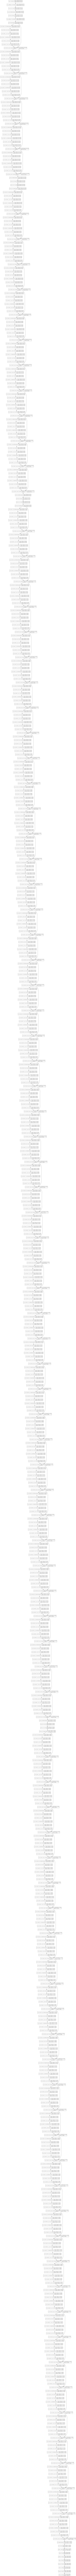

In [ ]:
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=True, show_dtype=False,
    show_layer_names=True, rankdir='TB', expand_nested=True, dpi=32
)

In [23]:
count_trainable = 0
count_non_trainable = 0

#'''
if pointTrainableAfter == "allDefault":
    for layer in model.layers:
        layer.trainable=True
        count_trainable += 1
elif pointTrainableAfter > 0:
    for layer in model.layers[:pointTrainableAfter]: # [:-pointTrainableAfter]
        layer.trainable=False
        count_non_trainable += 1
    for layer in model.layers[pointTrainableAfter:]: # [-pointTrainableAfter:]
        layer.trainable=True
        count_trainable += 1
#'''

'''
for layer in model.layers:
    layer.trainable=True
    count_trainable += 1
#'''

print("count_non_trainable =", count_non_trainable)
print("count_trainable =", count_trainable)
print("Total number of layers =", count_non_trainable+count_trainable)

count_non_trainable = 0
count_trainable = 715
Total number of layers = 715


In [ ]:
'''
checkpointer_name  = "weights."+dataset+".pad"+str(pad)+"."+impl_type+".wInit."+str(init_weights)+".TrainableAfter."+str(pointTrainableAfter)+\
                     modelExt+".opt."+OPTIMIZER+".drop."+str(DROPOUT)+".batch"+str(BATCH_SIZE)+ext+".hdf5"
log_name = "log."+checkpointer_name[8:-5]+".log"

print('checkpointer_name =', checkpointer_name)
print('log_name =', log_name)
#'''

In [24]:
# "RMSProp" "SGD" "Adam" "Adamax" "Adadelta" "Adagrad" "SGD"
#optimizer = tf.keras.optimizers.RMSprop(lr = LEARNING_RATE, epsilon=EPSILON)

if OPTIMIZER == "RMSProp":
    optimizer = tf.keras.optimizers.RMSprop(lr = LEARNING_RATE, epsilon=EPSILON)
elif OPTIMIZER == "Adam":
    optimizer = tf.keras.optimizers.Adam(lr = LEARNING_RATE, epsilon=EPSILON, beta_1=0.9, beta_2=0.999)
elif OPTIMIZER == "Adamax":
    optimizer = tf.keras.optimizers.Adamax(lr = LEARNING_RATE, epsilon=EPSILON, beta_1=0.9, beta_2=0.999)
elif OPTIMIZER == "Adadelta":
    optimizer = tf.keras.optimizers.Adadelta(lr = LEARNING_RATE, epsilon=EPSILON, rho=0.95)
elif OPTIMIZER == "Adagrad":
    optimizer = tf.keras.optimizers.Adagrad(lr = LEARNING_RATE, epsilon=EPSILON, initial_accumulator_value=0.1)
elif OPTIMIZER == "SGD":
    optimizer = tf.keras.optimizers.SGD(lr = LEARNING_RATE, momentum=0.9)

model.compile(
    #optimizer=OPTIMIZER,
    optimizer=optimizer,
    loss=LOSS,
    metrics=['accuracy']
)

print("OPTIMIZER =", OPTIMIZER)

OPTIMIZER = Adam


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [25]:
# save the best model with least validation loss
checkpointer = ModelCheckpoint(filepath = work_dir+checkpointer_name, 
                               #monitor='val_accuracy',
                               monitor='val_loss',
                               save_weights_only=False,  
                               mode='auto', 
                               verbose = 0, # 0 = silent, 1 = progress bar, 2 = one line per epoch
                               save_best_only =False
                               )
checkpointer_best = ModelCheckpoint(filepath = work_dir+"best_"+checkpointer_name, 
                                    monitor='val_loss', 
                                    save_weights_only=False,
                                    mode='auto',  
                                    verbose = 1, 
                                    save_best_only = True
                                    )
early_stopping = EarlyStopping(monitor='loss', patience=early_stop_after_epochs)

In [26]:
'''
if 'count_no_improvement' not in globals():
    count_no_improvement = 0
    print("count_no_improvement =", count_no_improvement)
#'''
'''
count_no_improvement = 0
epoch_initial = False
#'''
min_delta = 0.0009
print("count_no_improvement =", count_no_improvement)

def checkBestPerformance(epoch, logs):
    save_filepath = work_dir+"best_"+checkpointer_name

    global epoch_initial
    if epoch_initial == True:
        epoch_initial = False
        model.save(filepath = save_filepath)
        print(". Model saved!")

    elif epoch_initial == False:
        global count_no_improvement

        log_data = pd.read_csv(work_dir+log_name, sep=',', usecols=['val_loss', 'val_accuracy'], engine='python')
        min_val_loss = float(str(min(log_data.val_loss.values))[:6])
        max_val_acc = float(str(max(log_data.val_accuracy.values))[:6])

        current_val_acc = float(str(logs['val_accuracy'])[:6])
        current_val_loss = float(str(logs['val_loss'])[:6])

        if (current_val_loss < min_val_loss) and (abs(current_val_loss-min_val_loss) >= min_delta):
            count_no_improvement = 0
            model.save(filepath = save_filepath)
            print("\nval_loss decreased from",min_val_loss," to",current_val_loss,"( val_accuracy =",current_val_acc,").")

        elif (current_val_loss==min_val_loss) and (current_val_acc>max_val_acc):
            count_no_improvement = 0
            model.save(filepath = save_filepath)
            print("\nval_accuracy increased to", current_val_acc, ".")

        else:
            count_no_improvement += 1
            print(". count_no_improvement =", count_no_improvement)

        if count_no_improvement >= early_stop_after_epochs:
            global list_callbacks
            del list_callbacks, count_no_improvement
            #print("count_no_improvement =", count_no_improvement, "... list_callbacks =", list_callbacks)

count_no_improvement = 0


In [27]:
epochs_completed = 0
list_callbacks = []
csv_logger = CSVLogger(work_dir+log_name, separator=',', append=True)

#if 'list_callbacks' in globals():
#    del list_callbacks

try:
    log_data = pd.read_csv(work_dir+log_name, sep=',', usecols=['epoch'], engine='python')
    epochs_completed = log_data.shape[0]

    #if epochs_completed > 0:
    model = load_model(work_dir+checkpointer_name)
    list_callbacks = [checkpointer, LambdaCallback(on_epoch_end=checkBestPerformance), csv_logger]
    print("epochs_completed =", epochs_completed)

except Exception as error:
    if epochs_completed == 0:
        # list_callbacks = [checkpointer, checkpointer_best, csv_logger, early_stopping] 
        list_callbacks = [checkpointer, LambdaCallback(on_epoch_end=checkBestPerformance), csv_logger]
        print("epochs_completed =", epochs_completed)
    elif epochs_completed > 0:
        print(error)

print('checkpointer_name =', checkpointer_name)

epochs_completed = 0
checkpointer_name = weights.MalayaKew.gray3D.(128, 128, 3).pad0.TransferLearning3D.DenseNet201.wInit.imagenet.TrainableAfter.allDefault.Dense.1024.1024.2048.actF.elu.opt.Adam.drop.0.5.batch16.Flatten.l2.0.001.run_1.hdf5


In [ ]:
print('checkpointer_name =', checkpointer_name)
print("Previously completed epochs =", epochs_completed)
print("count_no_improvement =", count_no_improvement, "\n")

#'''
try:
    start_time = time.time()
    history = model.fit(np_train_imageset, final_train_label, 
                        shuffle=True, 
                        batch_size = BATCH_SIZE, 
                        epochs = NUM_EPOCHS - epochs_completed, 
                        #steps_per_epoch = 2,
                        #validation_split = validation_split, 
                        validation_data = (np_test_imageset, final_test_label),
                        callbacks=list_callbacks
                        )
    elapsed_time = time.time() - start_time 
    print("\nTime elapsed: ", elapsed_time)

except Exception as error:
    print("\nError:", error)
#'''

checkpointer_name = weights.MalayaKew.gray3D.(128, 128, 3).pad0.TransferLearning3D.DenseNet201.wInit.imagenet.TrainableAfter.allDefault.Dense.1024.1024.2048.actF.elu.opt.Adam.drop.0.5.batch16.Flatten.l2.0.001.run_1.hdf5
Previously completed epochs = 0
count_no_improvement = 0 

Epoch 1/300
2167/2167 [==============================] - 381s 152ms/step - loss: 8.0324 - accuracy: 0.1062 - val_loss: 5.9455 - val_accuracy: 0.4299
. Model saved!
Epoch 2/300
2167/2167 [==============================] - 349s 161ms/step - loss: 6.2887 - accuracy: 0.3130 - val_loss: 4.8255 - val_accuracy: 0.6285

val_loss decreased from 5.9454  to 4.8254 ( val_accuracy = 0.6285 ).
Epoch 3/300
2167/2167 [==============================] - 349s 161ms/step - loss: 5.3135 - accuracy: 0.4755 - val_loss: 4.2264 - val_accuracy: 0.7400

val_loss decreased from 4.8254  to 4.2263 ( val_accuracy = 0.74 ).
Epoch 4/300
2167/2167 [==============================] - 349s 161ms/step - loss: 4.7014 - accuracy: 0.5922 - val_loss: 3.

In [ ]:
'''
Record: 
;
---
Test Acc: 0.3947, Test Loss: 3.1064: ep10, weights.MalayaKew.gray.pad10.TransferLearning.InceptionResNetV2.wInit.None.TrainableAfter.allDefault.Dense.512.actF.relu.opt.Adam.drop.0.0.batch64.Flatten.run_1.hdf5
Test Acc: 0.6353, Test Loss: 1.8520: ep30, weights.MalayaKew.gray3D.(64, 64, 3).pad0.TransferLearning3D.ResNet50.wInit.imagenet.TrainableAfter.allDefault.actF.relu.opt.Adam.drop.0.0.batch64.Flatten.run_1.hdf5
Test Acc: 0.7067, Test Loss: 1.8239: ep32, weights.MalayaKew.gray3D.(64, 64, 3).pad0.TransferLearning3D.ResNet50.wInit.imagenet.TrainableAfter.allDefault.actF.relu.opt.RMSProp.drop.0.0.batch64.Flatten.run_2.hdf5
Test Acc: 0.6276, Test Loss: 1.4814: ep42, weights.MalayaKew.gray3D.(64, 64, 3).pad0.TransferLearning3D.ResNet50.wInit.imagenet.TrainableAfter.allDefault.actF.relu.opt.SGD.drop.0.0.batch64.Flatten.run_1.hdf5

Test Acc: 0.4453, Test Loss: 2.4178: ep17, weights.MalayaKew.gray3D.(64, 64, 3).pad0.TransferLearning3D.ResNet50.wInit.imagenet.TrainableAfter.170.actF.relu.opt.Adam.drop.0.0.batch64.Flatten.run_1.hdf5
Test Acc: 0.6044, Test Loss: 2.3383: ep22, weights.MalayaKew.gray3D.(64, 64, 3).pad0.TransferLearning3D.ResNet50.wInit.imagenet.TrainableAfter.allDefault.Dense.512.512.512.512.actF.elu.opt.Adam.drop.0.5.batch64.Flatten.regularizers.l2.0.0001.run_1.hdf5
Test Acc: 0.6112, Test Loss: 2.5392: ep24, weights.MalayaKew.gray3D.(64, 64, 3).pad0.TransferLearning3D.ResNet50.wInit.imagenet.TrainableAfter.allDefault.Dense.512.512.512.512.Res.actF.elu.opt.Adam.drop.0.5.batch64.Flatten.regularizers.l2.0.0001.run_1.hdf5
Test Acc: 0.6484, Test Loss: 1.8469: ep24, weights.MalayaKew.gray3D.(64, 64, 3).pad0.TransferLearning3D.DenseNet201.wInit.imagenet.TrainableAfter.allDefault.actF.relu.opt.Adam.drop.0.0.batch64.Flatten.run_1.hdf5
Test Acc: 0.6139, Test Loss: 2.3339: ep35, weights.MalayaKew.gray3D.(64, 64, 3).pad0.TransferLearning3D.DenseNet201.wInit.imagenet.TrainableAfter.allDefault.Dense.512.512.512.512.actF.elu.opt.SGD.drop.0.0.batch32.Flatten.run_1.hdf5
Test Acc: 0.7291, Test Loss: 4.8518: ep117, weights.MalayaKew.gray3D.(64, 64, 3).pad0.TransferLearning3D.DenseNet201.wInit.imagenet.TrainableAfter.allDefault.Dense.1024.1024.2048.actF.elu.opt.SGD.drop.0.5.batch16.Flatten.l2.0.01.run_1.hdf5

#'''

csv_logger = CSVLogger(work_dir+log_name, separator=',', append=True)
log_data = pd.read_csv(work_dir+log_name, sep=',', usecols=['epoch'], engine='python')
epochs_completed = log_data.shape[0]

result = model.evaluate(final_test_imageset, final_test_label)
print("Test Acc: {}, Test Loss: {}: ep{}, {}\n".format(round(result[1],4), round(result[0],4), epochs_completed, checkpointer_name))


In [ ]:
#checkpointer_name = "weights.Fashion.DenseNet121.wInit.None.TrainableAfterallDefault.opt.SGD.drop.0.0.batch32.Flatten.run_1.hdf5"
model_loaded = load_model(work_dir+"best_"+checkpointer_name)
print("Loaded "+work_dir+"best_"+checkpointer_name+".")

In [ ]:
'''
Record: 
;
---
Test Acc: 0.3833, Test Loss: 2.1568: ep10, best_weights.MalayaKew.gray.pad10.TransferLearning.InceptionResNetV2.wInit.None.TrainableAfter.allDefault.Dense.512.actF.relu.opt.Adam.drop.0.0.batch64.Flatten.run_1.hdf5
Test Acc: 0.7168, Test Loss: 1.2828: ep30, best_weights.MalayaKew.gray3D.(64, 64, 3).pad0.TransferLearning3D.ResNet50.wInit.imagenet.TrainableAfter.allDefault.actF.relu.opt.Adam.drop.0.0.batch64.Flatten.run_1.hdf5
Test Acc: 0.6815, Test Loss: 1.5833: ep32, best_weights.MalayaKew.gray3D.(64, 64, 3).pad0.TransferLearning3D.ResNet50.wInit.imagenet.TrainableAfter.allDefault.actF.relu.opt.RMSProp.drop.0.0.batch64.Flatten.run_2.hdf5
Test Acc: 0.6133, Test Loss: 1.4825: ep42, best_weights.MalayaKew.gray3D.(64, 64, 3).pad0.TransferLearning3D.ResNet50.wInit.imagenet.TrainableAfter.allDefault.actF.relu.opt.SGD.drop.0.0.batch64.Flatten.run_1.hdf5

Test Acc: 0.4410, Test Loss: 2.0524: ep17, best_weights.MalayaKew.gray3D.(64, 64, 3).pad0.TransferLearning3D.ResNet50.wInit.imagenet.TrainableAfter.170.actF.relu.opt.Adam.drop.0.0.batch64.Flatten.run_1.hdf5
Test Acc: 0.6757, Test Loss: 1.5270: ep22, best_weights.MalayaKew.gray3D.(64, 64, 3).pad0.TransferLearning3D.ResNet50.wInit.imagenet.TrainableAfter.allDefault.Dense.512.512.512.512.actF.elu.opt.Adam.drop.0.5.batch64.Flatten.regularizers.l2.0.0001.run_1.hdf5
Test Acc: 0.5914, Test Loss: 1.7184: ep24, best_weights.MalayaKew.gray3D.(64, 64, 3).pad0.TransferLearning3D.ResNet50.wInit.imagenet.TrainableAfter.allDefault.Dense.512.512.512.512.Res.actF.elu.opt.Adam.drop.0.5.batch64.Flatten.regularizers.l2.0.0001.run_1.hdf5
Test Acc: 0.7659, Test Loss: 0.7799: ep24, best_weights.MalayaKew.gray3D.(64, 64, 3).pad0.TransferLearning3D.DenseNet201.wInit.imagenet.TrainableAfter.allDefault.actF.relu.opt.Adam.drop.0.0.batch64.Flatten.run_1.hdf5
Test Acc: 0.7326, Test Loss: 1.1991: ep35, best_weights.MalayaKew.gray3D.(64, 64, 3).pad0.TransferLearning3D.DenseNet201.wInit.imagenet.TrainableAfter.allDefault.Dense.512.512.512.512.actF.elu.opt.SGD.drop.0.0.batch32.Flatten.run_1.hdf5
Test Acc: 0.7409, Test Loss: 4.803: ep117, best_weights.MalayaKew.gray3D.(64, 64, 3).pad0.TransferLearning3D.DenseNet201.wInit.imagenet.TrainableAfter.allDefault.Dense.1024.1024.2048.actF.elu.opt.SGD.drop.0.5.batch16.Flatten.l2.0.01.run_1.hdf5

#'''
'''
csv_logger = CSVLogger(work_dir+log_name, separator=',', append=True)
log_data = pd.read_csv(work_dir+log_name, sep=',', usecols=['epoch'], engine='python')
epochs_completed = log_data.shape[0]
#'''

result2 = model_loaded.evaluate(final_test_imageset, final_test_label)
#print("nLayers: {}, nNeurons: {}, DROPOUT: {}, Test Acc: {}, Test Loss: {}".format(NUM_LAYERS, NUM_NEURONS, DROPOUT, round(result2[1], 4), round(result2[0], 4)))
print("Test Acc: {}, Test Loss: {}: ep{}, {}\n".format(round(result2[1],4), round(result2[0],4), epochs_completed, "best_"+checkpointer_name))


In [ ]:
import csv

with open(work_dir+'Records.csv', "a") as fp:
    wr = csv.writer(fp, dialect='excel')
    try:
        wr.writerow([checkpointer_name[8:-5], round(result2[1], 4), round(result2[0], 4), elapsed_time])
    except:
        wr.writerow([checkpointer_name[8:-5], round(result2[1], 4), round(result2[0], 4)])
print("Saved results.")

In [ ]:
#Confution Matrix and Classification Report
#'''
Y_pred = model_loaded.predict_generator(final_test_imageset, len(final_test_imageset))
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(np_test_label, y_pred))
#'''

In [ ]:
# Precision [TP/TP+FP] = The ratio of correctly predicted positive observations to the total predicted positive observations.
# Recall (Sensitivity) [TP/TP+FN] = The ratio of correctly predicted positive observations to the all observations in actual class - 'yes'.
# F1 score [F1 Score = 2*(Recall * Precision) / (Recall + Precision)] = The weighted average of Precision and Recall.
# Support = The number of samples of the true response that lie in that class.
#'''
print('Classification Report:')
#target_names = ['Mono', 'Di'] # not ['Di', 'Mono']
print(classification_report(np_test_label, y_pred)) #, target_names=target_names))
#'''

In [ ]:
'''
print('Classification Report')
print(classification_report(y_test, y_pred, target_names=list_categories))
#'''

In [ ]:
log_data = pd.read_csv(work_dir+log_name, sep=',', engine='python') 

In [ ]:
# Getting the model history keys 
#history.history.keys()
log_data.head()

In [ ]:
# plot the training artifacts
title = "Val loss for "+dataset+" "+impl_type

plt.plot(log_data['loss'])
plt.plot(log_data['val_loss'])
plt.title(title)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'], loc = 'best')

img_path = work_dir+'Images/vLoss_'+checkpointer_name[8:-5]+'.png'
plt.savefig(img_path, dpi=600)
plt.show()
print('img_path =', img_path)

In [ ]:
title = "Val acc for "+dataset+" "+impl_type

plt.plot(log_data['accuracy'])
plt.plot(log_data['val_accuracy'])
plt.title(title)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy','val_accuracy'], loc = 'best')

img_path = work_dir+'Images/vAcc_'+checkpointer_name[8:-5]+'.png'
plt.savefig(img_path, dpi=600)
plt.show()
print('img_path =', img_path)